<a href="https://colab.research.google.com/github/Daniel-Juri/Data_Science_Jobs/blob/main/DataScience_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS ON DATA SCIENCE JOB SALARIES**

# **1. THE DATA SCIENCE DATASET**

The Dataset contains 11 columns, which includes:

1. **work_year:**	The year the salary was paid.

2. **experience_level:**	The experience level in the job during the year with the following possible values:

  *   EN = Entry-level / Junior 
  *   MI = Mid-level / Intermediate 
  *   SE = Senior-level / Expert 
  *   EX = Executive-level / Director


3. **employment_type:** The type of employement for the role: 

  *  PT = Part-time 
  *  FT = Full-time
  *  CT = Contract 
  *  FL = Freelance

4. **job_title:**	The role worked in during the year.

5. **salary**:	The total gross salary amount paid.

6. **salary_currency:**	The currency of the salary paid as an ISO 4217 currency code.

7. **salaryinusd:**	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

8. **employee_residence:**	Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **remote_ratio:**	The overall amount of work done remotely, possible values are as follows:

  * 0 = No remote work (less than 20%)
  * 50 = Partially remote 
  * 100 = Fully remote (more than 80%)

10. **company_location:**	The country of the employer's main office or contracting branch as an ISO 3166 country code.

11. **company_size:**	The average number of people that worked for the company during the year:

  *   S = less than 50 employees (small) 
  *   M = 50 to 250 employees (medium) 
  *   L = more than 250 employees (large)

**EDA OBJECTIVES**

1. Explore every column in the dataset
2. Find correlation between related columns
3. Perform analysis on job title, company location, experience level, and salary analysis 
4. Practice data analysis techniques and improve


# **2. IMPORT LIBRARIES**

In [1]:
!pip install country_converter

import pandas as pd
import numpy as np
import country_converter as coco

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 4.9 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=28c178413d8b58ca64426f212c091a7111b1a5b2b0ab9a5261a230a17f1fadfb
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country-converter


In [2]:
Data = pd.read_csv('/content/ds_salaries.csv', index_col = 0)

# **3. DATA PREPROCESSING**

In [3]:
Data['remote_ratio'] = Data.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'])
Data['experience_level'] = Data.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director'])

Data['employment_type'] = Data.employment_type.replace(['FT','PT','CT', 'FL'], ['Full-time', 'Part-time', 'Contract', 'Freelance'])
Data['company_size'] = Data.company_size.replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'])

# **4. READING THE DATASET**

In [4]:
from IPython.core.display import HTML

def multi_table(table_list):
        return HTML('<table><tr style="background-color:black;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [5]:
multi_table([pd.DataFrame(Data[col].value_counts()) for col in Data.columns])

,work_year
2022,318
2021,217
2020,72
,experience_level
Senior-level/Expert,280
Mid-level/Intermediate,213
Entry-level/Junior,88
Executive-level/Director,26
,employment_type
Full-time,588


# **5. EXPLORATORY DATA ANALYSIS (EDA)**

In [6]:
Data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level/Intermediate,Full-time,Data Scientist,70000,EUR,79833,DE,On-site,DE,Large
1,2020,Senior-level/Expert,Full-time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,Small
2,2020,Senior-level/Expert,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid-level/Intermediate,Full-time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,Small
4,2020,Senior-level/Expert,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [7]:
Data.shape

(607, 11)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 56.9+ KB


In [9]:
Data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
Data.duplicated().sum()

42

In [11]:
Data = Data.drop_duplicates()

In [12]:
Data.shape

(565, 11)

In [13]:
Data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,565.00,"2,021.36",0.70,"2,020.00","2,021.00","2,021.00","2,022.00","2,022.00"
salary,565.00,"338,115.99","1,599,878.79","4,000.00","67,000.00","110,925.00","165,000.00","30,400,000.00"
salary_in_usd,565.00,"110,610.34","72,280.70","2,859.00","60,757.00","100,000.00","150,000.00","600,000.00"


# **6. UNIVARIATE ANALYSIS**

This section of the EDA, we'll explore each column in the dataset to see what kind of important information it provides.

**CATEGORICAL ANALYSIS**

There are 7 categorical columns from this dataset: 

1. Experiece Level
2. Job Titles
3. Employment Type
4. Employee Resdience
5. Company Location
6. Company Size
7. Remote ratio (converted from numerical to categorical)



**EXPERIENCE LEVEL**

In [15]:
ex_level=Data['experience_level'].value_counts()
fig=px.pie(names=ex_level.index,
            values=ex_level.values,
            color_discrete_sequence=px.colors.sequential.PuBuGn,
            title= 'Experience level',
            template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=12,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))


fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**EMPLOYMENT TYPE**

In [16]:
ex_level=Data['employment_type'].value_counts()
emt_names = ['Full-Time','Part-Time','Contract','Freelance']
fig=px.pie(names=emt_names,
            values=ex_level.values,
            color_discrete_sequence=px.colors.sequential.PuBuGn,
            title= 'Employment type',
            template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=12,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))


fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**JOB TITLE**

In [17]:
top10_job_title = Data['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Data Science Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="Frequency",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [18]:
ex_level=Data['job_title'].value_counts()[:5]
fig=px.pie(names=ex_level.index,
            values=ex_level.values,
            color_discrete_sequence=px.colors.sequential.PuBuGn,
            title= 'Top 5 Job Title',
            template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=12,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))


fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

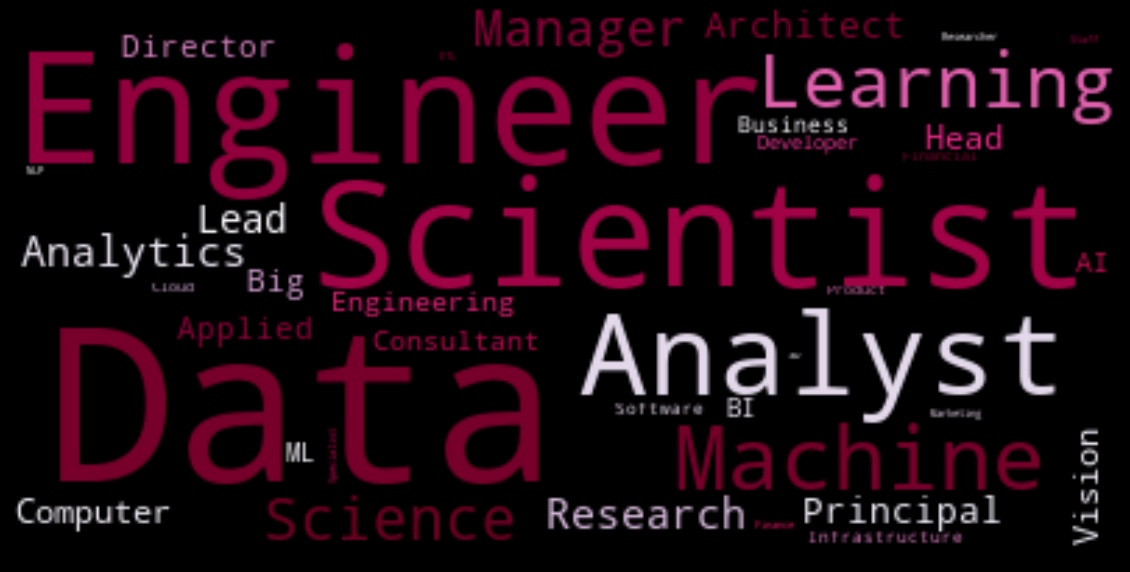

In [19]:
text = " ".join(subject_titles for subject_titles in Data["job_title"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'PuRd', min_font_size = 2).generate(text)
plt.figure(figsize = (20, 15))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

**EMPLOYEE LOCATION**

In [20]:
converted_country = coco.convert(names=Data['employee_residence'], to="ISO3")
Data['employee_residence'] = converted_country

residence = Data['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.Reds,
                    template='plotly_dark',
                    title = 'Employee Location Distribution Map')

fig.update_layout(font = dict(size= 20, family="Franklin Gothic"))
fig.show()

In [21]:
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.Reds,
             text=top10_employee_location.values,
             title= 'Top 10 Employee Location',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Employee Location",
    yaxis_title="Frequency",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

**COMPANY LOCATION**

In [22]:
top10_company_location = Data['company_location'].value_counts()[:10]
fig = px.bar(y=top10_company_location.values, 
             x=top10_company_location.index, 
             color = top10_company_location.index,
             color_discrete_sequence=px.colors.sequential.Reds,
             text=top10_company_location.values,
             title= 'Top 10 Company Location',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Company Location",
    yaxis_title="Frequency",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [24]:
comp_location = Data['company_location'].value_counts()

fig = px.treemap(comp_location, 
                 path=[comp_location.index],
                 values=comp_location.values, 
                 title = 'Company location distribution',
                 color=comp_location.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

**COMPANY SIZE**

In [25]:
ex_level=Data['company_size'].value_counts()[:5]
fig=px.pie(names=ex_level.index,
            values=ex_level.values,
            color_discrete_sequence=px.colors.sequential.PuBuGn,
            title= 'Company size distribution',
            template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=12,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))


fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**REMOTE RATIO**

In [26]:
remote = Data['remote_ratio'].value_counts()
fig=px.pie(names=remote.index,
            values=remote.values,
            color_discrete_sequence=px.colors.sequential.PuBuGn,
            title= 'Remote Work Distribution',
            template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=12,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))


fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**NUMERICAL ANALYSIS**

There are 3 numerical columns from this dataset: 

1. work year
2. salary_currency
3. salary_in_usd

**WORK YEAR**

In [27]:
wkyear = Data['work_year'].value_counts()
fig = px.pie(values=wkyear.values, 
             names=wkyear.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'work year distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'

fig.show()

**SALARY CURRENCY**

In [29]:
Salary_type = Data['salary_currency'].value_counts()[:5]
fig = px.pie(values=Salary_type.values, 
             names=Salary_type.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Salary currency distribution',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=18,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'

fig.show()

**SALARY IN USD**

In [31]:
USD_salary = [Data['salary_in_usd']]
fig = px.box(y=Data['salary_in_usd'],template= 'plotly_dark', title = 'Salary in USD (BoxPlot)')
fig.update_layout(
    yaxis_title = 'Salary (USD) range',
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

# **7. MULTIVARIATE ANALYSIS**

This section of the EDA, we'll explore how different columns relate to each other in the dataset to see what kind of important information it provides.

**REMOTE RATIO BY WORK YEAR**

In [35]:
fig=px.histogram(Data, x='remote_ratio',color='work_year', barmode='group',title="Count of each Work Type")
fig.update_layout(template="plotly_dark", title='Remote Ratio by Work Year', yaxis_title = 'Frequency',
                  font = dict(size=17,family="Franklin Gothic" ))

fig.show();

**EMPLOYEE LOCATION AND COMPANY LOCATION COMPARISON**

In [36]:
converted_country = coco.convert(names=Data['company_location'], to="ISO3")
Data['company_location'] = converted_country

c_location = Data['company_location'].value_counts()
top_10_company_location = c_location[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Location', 
           x=top10_employee_location.index, y=top10_employee_location.values,
           text=top10_employee_location.values,marker_color='Red'),
    go.Bar(name='Company Location', x=top_10_company_location.index, 
           y=top_10_company_location.values,text=top_10_company_location.values,marker_color='Blue')
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Comparison of Employee Location and Company Location',template='plotly_dark',
                  yaxis_title = 'Frequency', font = dict(size=17,family="Franklin Gothic"))

fig.show()

**EXPERIENCE LEVEL BY INDIVIDUAL JOB TITLE**

In [37]:
exlevel_job = Data.groupby(['experience_level','job_title']).size()

entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]


exlevel_type = Data.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=entry_top3.index, y=entry_top3.values,
           text=entry_top3.values, marker_color='white'),
    go.Bar(name='Mid-level/Intermediate', x=mid_top3.index, y=mid_top3.values,
           text=mid_top3.values, marker_color='yellow'),
    go.Bar(name='Senior-level/Expert', x=senior_top3.index, y=senior_top3.values,
           text=senior_top3.values, marker_color='blue'),
    go.Bar(name='Executive-level/Director', x=executive_top3.index, y=executive_top3.values,
           text=executive_top3.values, marker_color='red'),
])
fig.update_layout(
    barmode = 'relative', xaxis_tickangle=-45, title='Experience Level for top job titles', 
    yaxis_title = 'Frequency', font = dict(family="Franklin Gothic", size=15), template='plotly_dark')

fig.show()

**AVERAGE SALARY BY COMPANY SIZE**

In [39]:
c_size = Data[['company_size','salary_in_usd']]
small = Data.loc[c_size['company_size']=='Small']
mid = Data.loc[c_size['company_size']=='Medium']
large =Data.loc[c_size['company_size']=='Large']
New_c_size= ['Small-sized Company','Medium-sized Company',' Large-sized Company']
colors = ['white','red','blue']

lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize=(20,5))

fig = go.Figure(data=px.bar(x= New_c_size, 
                            y=lst,
                            color = New_c_size,
                            color_discrete_sequence= colors,
                            title='Average Salary by Company Size',
                            text = np.round([num/1000 for num in lst],1),
                            template = 'plotly_dark',
                            height=500))
fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary ($)",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<Figure size 1440x360 with 0 Axes>

**AVERAGE SALARY BY WORK YEAR**

In [42]:
w2020 = Data.loc[(Data['work_year'] == 2020)]
w2021 = Data.loc[(Data['work_year'] == 2021)]
w2022 = Data.loc[(Data['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['white','red','blue']

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig = go.Figure(data=px.bar(x= year_salary.columns, 
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title=' Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
                            template = 'plotly_dark',
                            height=500))

fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

**AVERAGE SALARY BY EXPERIENCE LEVEL**

In [43]:
exlevel_salary = Data[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive-level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior-level/Expert']

group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
colors = ['white','yellow','blue','red']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]


fig = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in lst], 1),
                            template = 'plotly_dark',
                            height=500))


fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()


**AVERAGE SALARY BY COMPANY LOCATION**

In [44]:
salary_location = Data.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = 'Average Salary by Company Location')
fig.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig.show()

**HIGHEST SALARIES BY JOB TITLE**

In [48]:
salary_job = Data.nlargest(10, 'salary_in_usd')

fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout( barmode = 'relative', xaxis_tickangle=-45, 
                  title='Top 10 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"),
                  xaxis_title="Job Title",
                  yaxis_title="Salaries ")

**LOWEST SALARIES BY JOB TITLE**

In [49]:
salary_job = Data.nsmallest(10, 'salary_in_usd')

fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='Top 10 Lowest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"),
                  xaxis_title="Job Title",
                  yaxis_title="Salaries ")


**YEARLY SALARY DISTRIBUTION BY EXPEREIENCE LEVEL**

In [50]:
fig = px.scatter(Data, x='salary_in_usd', y='experience_level', animation_frame="work_year",
           size="salary_in_usd", color="job_title", hover_name='job_title',
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark', title="Salary by Experience level for each year"
           )
fig.show()

**SALARY DISTRIBUTION BY COMPANY SIZE AND EXPERIENCE LEVEL**

Text(36.54414305555555, 0.5, 'Salary')

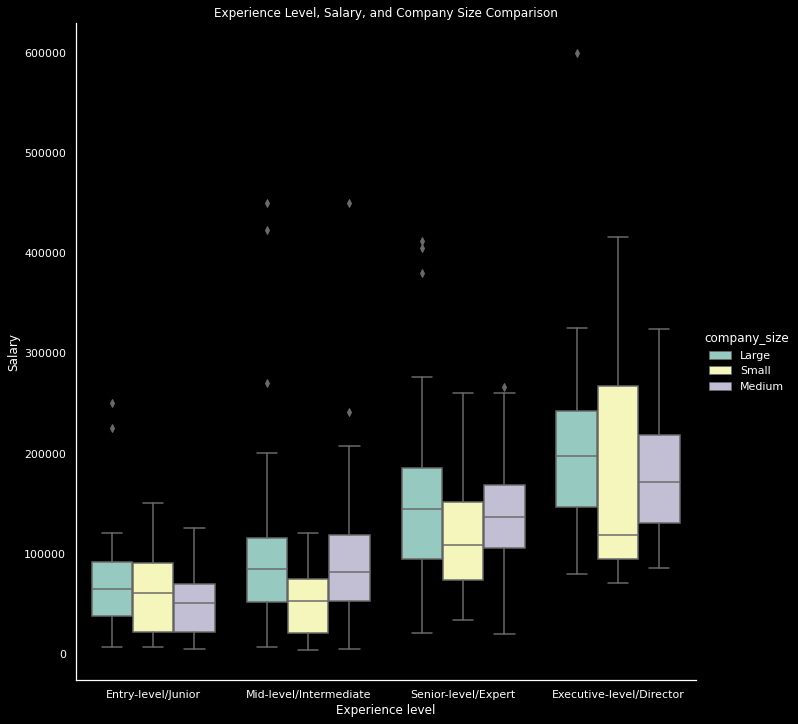

In [51]:
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
sns.catplot(data=Data,
           x ='experience_level',
           y ='salary_in_usd',
           order = group_labels ,
           height=10,
           kind='box',
           hue='company_size')
plt.title('Experience Level, Salary, and Company Size Comparison')
plt.xlabel('Experience level')
plt.ylabel('Salary')

**SALARY DISTRIBUTION BY REMOTE RATIO AND EMPLOYMENT TYPE**

Text(0.5, 25.960000000000043, 'Experience level')

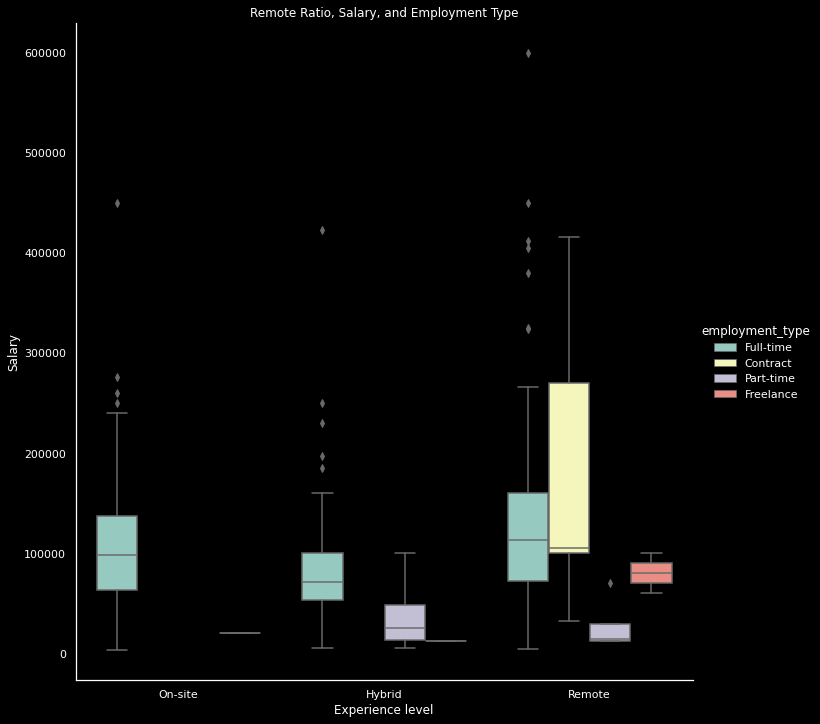

In [52]:
sns.catplot(data=Data,
           x='remote_ratio',
           y='salary_in_usd',
           hue='employment_type',
           height=10,
           kind='box')
plt.title('Remote Ratio, Salary, and Employment Type')
plt.ylabel('Salary')
plt.xlabel('Experience level')

Text(0.5, 1.0, 'Confusion Matrix')

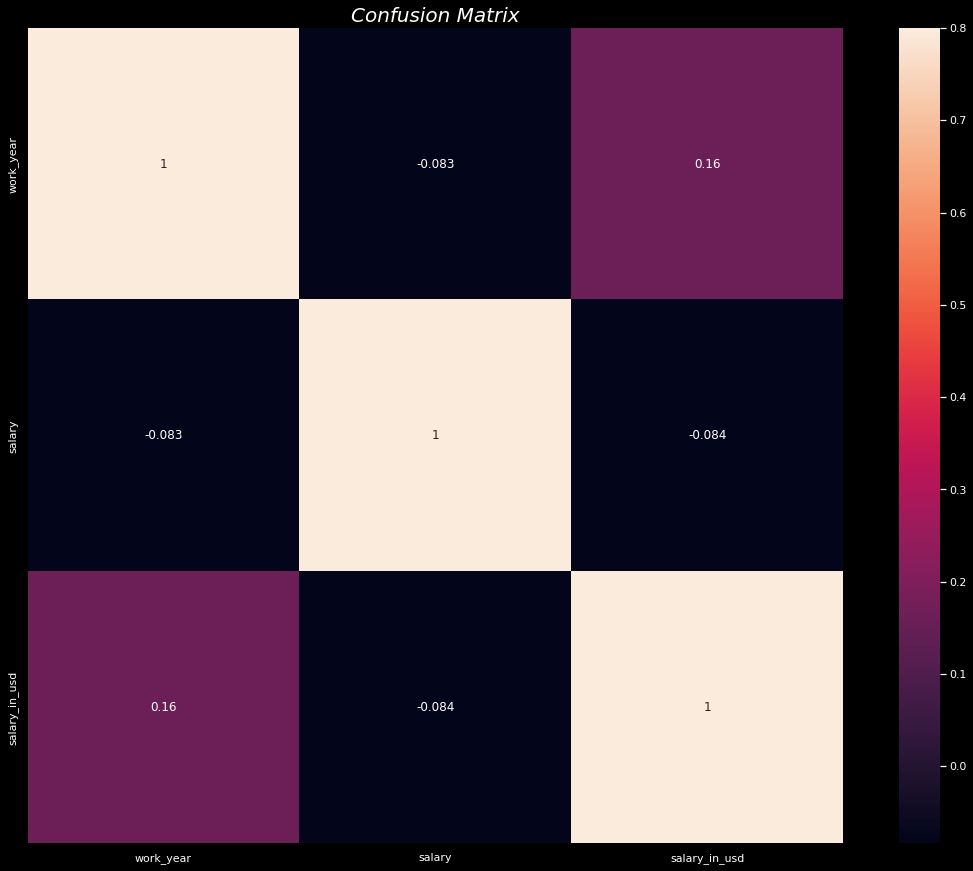

In [53]:
fig, ax = plt.subplots() 
fig.set_size_inches(20,15)
sns.heatmap(Data.corr(), vmax =.8, square = True, annot = True)
plt.title('Confusion Matrix',fontsize=20,fontstyle= 'oblique')

# **8. CONCLUSION**

Findings from the Exploratory data anaysis:

> Data Scientist, Data Engineer, and Data Analyst are the top 3 most popular job titles

> Most companys and employees are located in USA.

> USA and Russia have the highest average salary. Moving there would increase one's chances of getting paid more but nor necessarily increasing their standard of living since other external factors weren't included.

> Remote work is more popular than hybrid and on-site work. This may be due to the COVID-19 pandemic that happened.

> Remote work is getting more popular as the years go by. Same applies to on-site work but to a much lesser degree.

> Most Data Science employees are paid in USD compared to other forms of currency.

> Large and middle-sized companies are providing more salaries compared to small ones.

> There is a massive increase in remote contract jobs in the Data Science Job market. The salary is also much higher on average compared to any combination of work and employment type.

> Significant salary increase once you achieve a senior-level/expert experience.

> Salaries in the Data Science Job Market has an upward trend as the years go by.

> The data from this analysis show that pursuing a Data Science related job is a good career choice in terms of flexibility (remote and hybrid options) and salary.






















